# Happiness EDA

The following note is personal attempt on exploring aggregate happiness from different countries of different years that was provided by [Kaggle](https://www.kaggle.com/unsdsn/world-happiness)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [13]:
# from data directory import all the csv files
df_2015 = pd.read_csv('./data/2015.csv')
df_2016 = pd.read_csv('./data/2016.csv')
df_2017 = pd.read_csv('./data/2017.csv')
df_2018 = pd.read_csv('./data/2018.csv')
df_2019 = pd.read_csv('./data/2019.csv')


In [14]:
df_2015.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [15]:
df_2015.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

In [16]:
df_2015.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

In [18]:
# rename Health (Life Expectancy) column to Life_Expectancy
df_2015.rename(columns={'Health (Life Expectancy)':'Life_Expectancy'}, inplace=True)

In [21]:
# group by region and get the mean of Happiness Score and Life_Expectancy and Freedom and Trust (Government Corruption) and sort by Happiness Score
df_2015.groupby('Region').mean()[['Happiness Score', 'Life_Expectancy', 'Freedom', 'Trust (Government Corruption)']].sort_values('Happiness Score', ascending=False)
# df_2015.groupby('Region').mean()[['Happiness Score', 'Life_Expectancy']].sort_values('Happiness Score', ascending=False)

,Happiness Score,Life_Expectancy,Freedom,Trust (Government Corruption)
Region,,,,
Australia and New Zealand,7.285000,0.919965,0.645310,0.392795
North America,7.273000,0.883710,0.589505,0.244235
Western Europe,6.689619,0.909148,0.549926,0.231463
Latin America and Caribbean,6.144682,0.703870,0.501740,0.117172
Eastern Asia,5.626167,0.877388,0.462490,0.127695
Middle East and Northern Africa,5.406900,0.705615,0.361751,0.181702
Central and Eastern Europe,5.332931,0.718774,0.358269,0.086674
Southeastern Asia,5.317444,0.677357,0.557104,0.151276
Southern Asia,4.580857,0.540830,0.373337,0.102536


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Western Europe'),
  Text(1, 0, 'North America'),
  Text(2, 0, 'Australia and New Zealand'),
  Text(3, 0, 'Middle East and Northern Africa'),
  Text(4, 0, 'Latin America and Caribbean'),
  Text(5, 0, 'Southeastern Asia'),
  Text(6, 0, 'Central and Eastern Europe'),
  Text(7, 0, 'Eastern Asia'),
  Text(8, 0, 'Sub-Saharan Africa'),
  Text(9, 0, 'Southern Asia')])

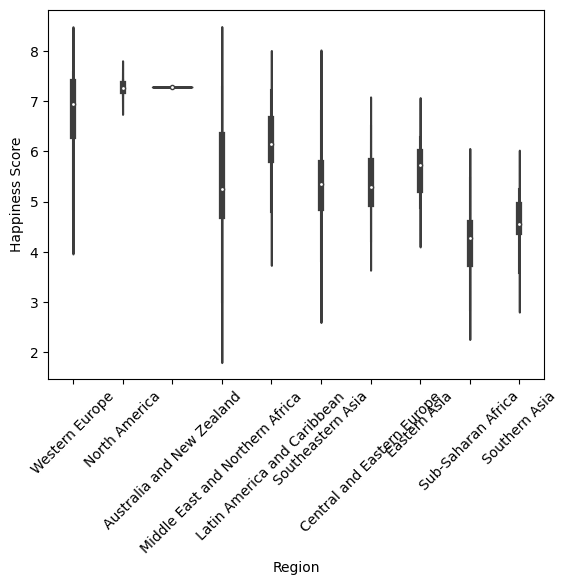

In [29]:
# plot grouped by happiness score of 2015
# df_2015.groupby('Region').mean()[['Happiness Score']].sort_values('Happiness Score', ascending=False).plot(kind='bar', figsize=(15,5), title='Happiness Score by Region in 2015')
# plot violin plot of happiness score of 2015 by region
sns.violinplot(x='Region', y='Happiness Score', data=df_2015, figsize=(15,5), title='Happiness Score by Region in 2015')
# turn x axis label 45 degree
plt.xticks(rotation=45)
# df_2015['Happiness Score'].plot(kind='hist', bins=20, figsize=(10,5))

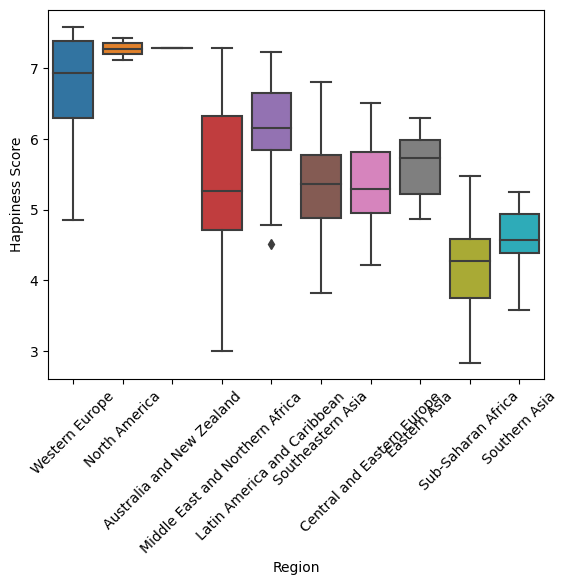

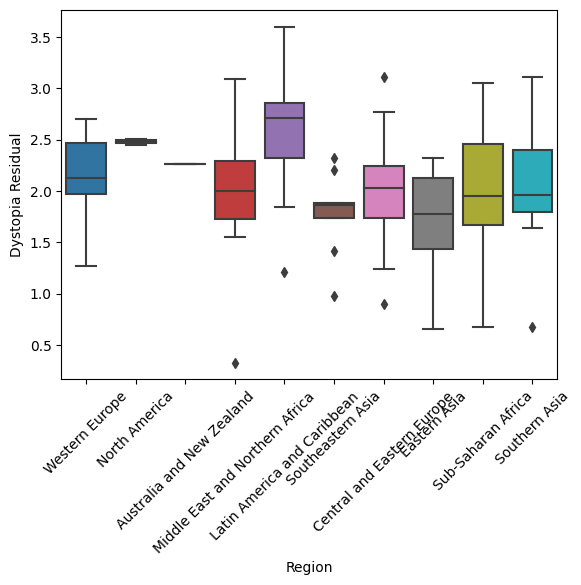

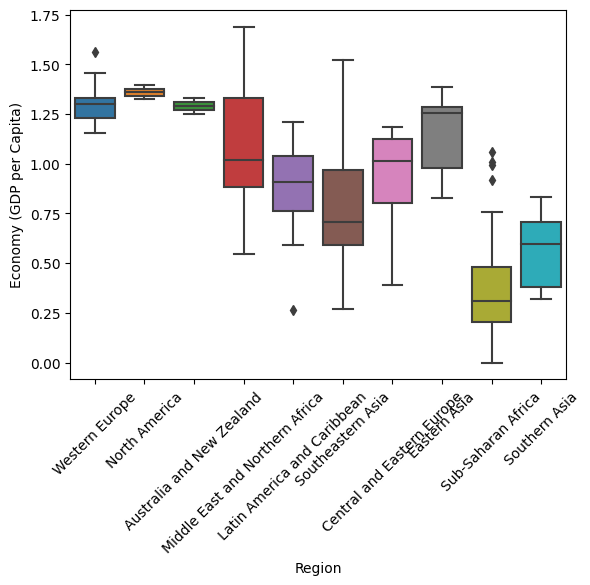

In [36]:
# boxplot of happiness score and dystopia residual of 2015 by region
sns.boxplot(x='Region', y='Happiness Score', data=df_2015)
# turn x axis label 45 degree
plt.xticks(rotation=45)
plt.show()

# boxplot of happiness score and dystopia residual of 2015 by region
sns.boxplot(x='Region', y='Dystopia Residual', data=df_2015)
# turn x axis label 45 degree
plt.xticks(rotation=45)
plt.show()

# boxplot of happiness score and dystopia residual of 2015 by region
sns.boxplot(x='Region', y='Economy (GDP per Capita)', data=df_2015)
# turn x axis label 45 degree
plt.xticks(rotation=45)
plt.show()